<a href="https://colab.research.google.com/github/adeeconometrics/literate-programming/blob/main/Optimizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Symbolic and Numerical Computation
By Dave Arthur D. Amiana 

----
Overview of the notebook:

This notebook will serve as an introduction to Optimization from single-variable to mutlivariable scenarios. For this notebook, optimization problems will be laid out from an engineering's perspective. Concepts will be briefly explained as well, but links to more elaborate discussions will be provided instead.

The primary focus of this notebook is to gain some understanding with the concept and implement them in Python using the scientific libraries for numerical and symbolic computations. 

----

### List of contents:
- Single-variable functions
    - Slope of a function
        - Secant
        - Tangent 
    - Newton's Method of approximation
    - Concavity and Convexity of a function
        - First Derivative test
        - Second Derivative test 

- Multi-variable functions
    - Partial derivatives
    - Gradient of a function
    - Gradient vector
    - Jacobi Matrix
    - Hessian Matrix
    - Langrangian Multiplier

In [155]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import sympy as sp

In [45]:
from sympy import init_printing, N
init_printing()

In [46]:
# initialize symbols
x,y,z = sp.symbols("x y z")

## Single Variable Functions
Single-variable (univariable) functions are of the form $f(x)$ such that a function $f$ takes one *argument* $x$ and *maps it to* $y$. It is often written as: $f:x\to y$. Albeit univariate functions are hardly used in the real world, taking some time to understand their behavior is rudimentary to understanding the behavior of multi-variable functions that we usually encounter in the wild.  

----

**Discussion:**

Since optimization is concerned with finding the maximum and minimum values for a given function. These values, which we refer to as *extremas* of a function requires us to traverse over the function and point out the maximum point where the function maps to i.e. the highest peak of the shape of our function, and the lowest value our function can get. We can express our objective as ``max(f(x))`` and ``min(f(x))`` which translates to finding the maximum/minimum value of our function given the derinition of our function ``f(x)``, but that's not the whole story underneath. In order to find the maximum values of our function, we have to get a sense of what does it mean to be the highest and lowest value of a function? 

Our objective is to find the regions where it maps to the maximum and minimum values of $y$ given $x$ and compare this for all values of $x\in D \text{ where D is the domain of our function}$. In other words, we wish to find $\forall x. [f(c)\geq f(x)\; | (x,c) \in D]$ for our maximum value and  $\forall x. [f(c)\leq f(x)\; | (x,c) \in D]$ for our minimum value.


Before we get into more details of this, it is good to begin with the notion of derivatives and how it ought to describe very little changes on our function. 

Recall the definition of the slope of a function $f(x)=y$, we denote the slope of $f(x)$ as $m=\frac{\Delta y}{\Delta x}$ such that $\Delta x$ desribes the changes in $x$ and $\Delta y$ describes the changes that happens in $y$. Hence, the slope of a function, written in two-point form is denoted as $m = \frac{y_2-y_1}{x_2 -x_1}$. But we wish to know the *very little changes* happening in a specific point $(x_0, y_0)$, our slope can only give us the change for a given interval. How can we generalize this notion to capture a richer sense of what's happening to our function when little values of $x_0$ changes? 

The derivative of a function of real variable i.e. $x\in \mathbb{R}$ measures the *sensitivity to change of the output value* with respect to a change in its *input value*, $x$.

<!-- insert illustration -->

The **derivative of a function** at a chosen input value, **when it exists**, is *the slope of the tangent line to the graph of the function at that point*. The **tangent line** is the best linear approximation of the function near that input value.

For this reason, the derivative is often described as the instantaneous rate of change, the ratio of the instantaneous change in the dependent variable to that of the independent variable.

----

Examples:

Notes for the following code blocks:

In [47]:
from sympy import Function, Eq, lambdify

A few technical notes:

The notion of optimization is drawn from the idea of limits of a function, we recall from our calculus class that a limit exists if it satisties the following properties:

$$\lim_{x \to c^+} f(x) = \lim_{x \to c^-} f(x)=\lim_{x \to c} f(x)=L$$
Else, we denote that the limit does not exist. This is an important context to understand the naive implementation of our method for computing the derivative of a function. 

----
definition of a derivative:

$$f'(a)=\lim _{h\to 0}{\frac {f(a+h)-f(a)}{h}}.$$

to test this, we know that the derivative of $\sin(x)$ is $\cos(x)$, we evalua this at $a=\pi$ which is $cos(\pi)=-1$. The following codeblocks implements the naive version, purely numerical methods, and purely symbolic methods.  

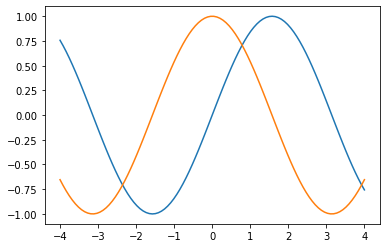

In [48]:
x_ = np.linspace(-4,4,100)
y_ = np.sin(x_)
y_0 = np.cos(x_)
plt.plot(x_, y_)
plt.plot(x_, y_0)

In [49]:
# naive implementation of numerical methods in differetiation

f = lambda _x: np.sin(_x)
a = np.pi

def derivative(f,a,h=10e-10):
    right = (f(a+h)-f(a))/h
    left = (f(a+(0-h))-f(a))/-h
    if(left==right):
        mid_val = (right+left)/2
        return mid_val
    else:
        print("the limit does not exist")

derivative(f,a)

In [50]:
# alternatively we can use SymPy's differential operator for symbolic solution
f_sp = sp.sin(x)
sp.diff(f_sp,x).subs(x,sp.pi)

In [51]:
f_np = sp.lambdify(x, sp.diff(sp.sin(x)), "numpy")
f_np(np.array([np.pi]*3))

array([-1., -1., -1.])

In [52]:
a,b,c =(1,2,3)
print(a,b,c)

1 2 3


#### Defnitions
Extemas:
- Absolute maximum
- Local maximum
- Absolute minimum
- Local minimum

Concavity

Convexity

Critical number - a critical number of a function $f$ is a number $c$ in the domain of $f$ such that either $f''(c)=0$ or $f'(c)$ does not exist. If $f$ has a local minimum or maximum at $c$, then $c$ is a critical number of $f$.

----
#### Theorems

----
#### Procedure
- Increasing/Decreasing Test.
    - if $f'(x)>0$ on an open interval, then $f$ is increasing on that interval. 
    - if $f'(x)<0$ on an open interval, then $f$ is decreasing on that interval.
- First Derivative Test. Suppose that $c$ is a *critical number* of a continuous function $f$.
    - if $f'$ changes from positive to negative at $c$, then $f$ has a local maximum at $c$.
    - if $f'$ changes from negative to postive at $c$, then $f$ has a local minimum at $c$.
    - if $f'$ does not change sign at $c$, that is, $f'$ is positive on both sides of $c$ or negative on both sides, then $f$ has no local maximum or minimum at $c$.


- Second Derivative Test. Suuppose $f''$ is continuous near $c$.
    - if $f'(c)=0$ and $f''(c)>0$, then $f$ has a local minimum at $c$.
    - if $f'(c)=0$ and $f''(c)<0$, then $f$ has a local maximum at $c$

- Concavity Test
    - if $f''(x)>0$ for all $x$ in the interval $I$, then the graph of $f$ is **concave upward** on $I$.
    - if $f''(x)>0$ for all $x$ in $I$, then the graph of $f$ is **concave downward** on $I$

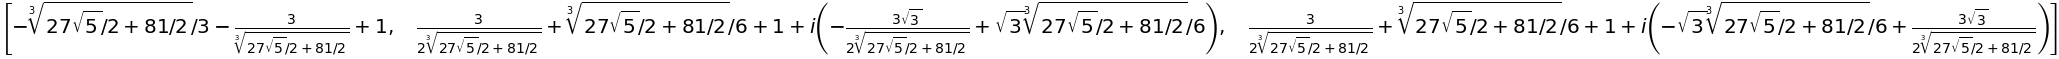

In [95]:
# objective: access solveset output
list_solution = list(sp.solveset(sp.Eq(x**3-3*x**2+5,0)))
list_solution

In [55]:
type(sp.solveset(sp.Eq(sp.sin(x),0)))

sympy.sets.sets.Union

In [56]:
# finding solutions 
sp.solveset(sp.Eq(sp.sin(x),0), x)

In [128]:
# algorithm for finding the extreme values of a function

def in_dec_test(func,_x):
    test_val = sp.diff(func, x).subs(x,_x)
    if(test_val>0):
        print("the point at ({0}, {1}, is increasing".format(_x,test_val))
    if(test_val<0):
         print("the point at ({0}, {1}, is decreasing".format(_x,test_val))

def find_critical_num(func):
    return np.array(sp.solveset(sp.Eq(func,0)))

def first_diff_test(init_func):    # add feature: domain boundary
    _critical_values = [sp.solveset(sp.diff(init_func,x),0)]    
    # get list of corrdinates
    _coordinates = [(_x, init_func.subs(x,_x)) for _x in _critical_values]
    # determine what they are

def second_diff_test(init_func):
    _critical_values = list(sp.solveset(sp.Eq(sp.diff(init_func, x))))   
    _relative_max = [(_x, init_func.subs(x,_x)) for _x in _critical_values if sp.diff(init_func, x,2).subs(x,_x)<0]
    _relative_min = [(_x, init_func.subs(x,_x)) for _x in _critical_values if sp.diff(init_func, x,2).subs(x,_x)>0]
    print("relative min", _relative_min, "\n relative max:", _relative_max)

def concavity_test(x):
    pass

def plot_func(func,x_):
    x_val = np.linspace(-x_,x_,1000)
    y = lambda a: np.array([func.subs(x,a_) for a_ in a])
    plt.plot(x_val,y(x_val))
    plt.ylim(-x_,x_)


fun = x**3-3*x**2+5
second_diff_test(fun)

relative min [(2, 1)] 
 relative max: [(0, 5)]


In [121]:
init_func =  x**3-3*x**2+5
_critical_values = list(sp.solveset(sp.Eq(sp.diff(init_func, x))))   
_relative_max = [(_x, init_func.subs(x,_x)) for _x in _critical_values if sp.diff(init_func, x,2).subs(x,_x)<0]
_relative_min = [(_x, init_func.subs(x,_x)) for _x in _critical_values if sp.diff(init_func, x,2).subs(x,_x)>0]
print("relative min", _relative_min, "\n relative max:", _relative_max)

relative min [(2, 1)] 
 relative max: [(0, 5)]


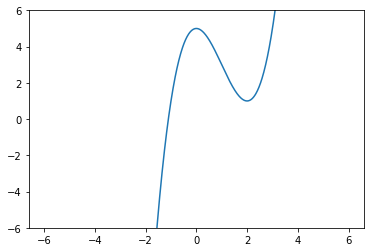

In [172]:
def plot_func(func,x_):
    x_val = np.linspace(-x_,x_,1000)
    y = lambda a: np.array([func.subs(x,a_) for a_ in a])
    plt.plot(x_val,y(x_val))
    plt.ylim(-x_,x_)

plot_func(x**3-3*x**2+5, 6)

In [112]:
f_ = x+1
def f(_f):
    return [(_x, _f.subs(x,_x)) for _x in range(0,10)]
f(f_)

In [91]:
list(sp.solveset(sp.Eq(sp.diff(x**2- 1, x))))
# type(sp.diff(x**2-1,x))

In [70]:
fc = sp.sin(x)
[fc.subs(x, a) for a in range(0,10)]

## Multivariable Functions

Discussion: 

Examples:

Notes for the following code blocks: